<a href="https://colab.research.google.com/github/shubhamguptasr/drowsinessDetection/blob/main/Drowsiness_Detection_Original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction.

##### MRL Eye Dataset was created by xyz. Give a short summary of what the code is doing and the final results.

# Import Libraries

In [1]:
import os
import shutil
from pathlib import Path

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from random import randint

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Conv2D, MaxPooling2D, AvgPool2D, BatchNormalization
from tensorflow.keras.models import Sequential

# Import MRL Eye Dataset from Web 




In [2]:
!wget http://mrl.cs.vsb.cz/data/eyedataset/mrlEyes_2018_01.zip
!unzip -q mrlEyes_2018_01.zip

--2023-03-21 00:12:12--  http://mrl.cs.vsb.cz/data/eyedataset/mrlEyes_2018_01.zip
Resolving mrl.cs.vsb.cz (mrl.cs.vsb.cz)... 158.196.141.22
Connecting to mrl.cs.vsb.cz (mrl.cs.vsb.cz)|158.196.141.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341866898 (326M) [application/zip]
Saving to: ‘mrlEyes_2018_01.zip’

mrlEyes_2018_01.zip 100%[===================>] 326.03M  5.54MB/s    in 56s     

2023-03-21 00:13:12 (5.80 MB/s) - ‘mrlEyes_2018_01.zip’ saved [341866898/341866898]



# Sparse Data into labelled Open & Closed Images  

In [3]:
#function to bucket open & close into different folders given a sample 
def bucket_Open_close_Image(path,open_dir,close_dir):

  print('Inside function : '+path)
  #print('Inside function : '+open_dir)
  #print('Inside function : '+close_dir)
   
  #creating new folders 
  Path(open_dir).mkdir(parents=True, exist_ok=True)
  Path(close_dir).mkdir(parents=True, exist_ok=True)

  with os.scandir(path) as entries:
      for entry in entries:
          if entry.is_file():
              #print(entry.name)                         
              open_close_indicator=entry.name.split("_")[4]          
              if open_close_indicator == '0':
                #print('Eyes close'+entry.name)
                try:
                  shutil.copy(entry,close_dir)
                except shutil.SameFileError:
                  pass                  
              elif open_close_indicator == '1':
                #print('Eyes open'+entry.name)                
                try:
                  shutil.copy(entry, open_dir)
                except shutil.SameFileError:
                  pass    
              else:
                print('Outlier found -non -labelled data '+entry.name)

In [4]:
#function to bucket the images  open & close  with subcategories 
# 1. glasses 2.reflections 3.lighting conditions/image quality)

#function to bucket open & close into different folders given a sample 
def bucket_Open_close_Image_into_subcategories(path,open_dir,close_dir):

  #print('Inside function : '+path)
  #print('Inside function : '+open_dir)
  #print('Inside function : '+close_dir)
   
  #creating parent folders
  Path(open_dir).mkdir(parents=True, exist_ok=True)
  Path(close_dir).mkdir(parents=True, exist_ok=True)

  #creating sub category folders for open
  open_glass_on =open_dir+'/glass_yes'
  open_glass_off =open_dir+'/glass_no'
  open_relection_none =open_dir+'/reflection_none'
  open_relection_low =open_dir+'/reflection_low'
  open_relection_high =open_dir+'/reflection_high'
  open_imagequality_bad =open_dir+'/imagequality_bad'
  open_imagequality_good =open_dir+'/imagequality_good'

  Path(open_glass_on).mkdir(exist_ok=True)
  Path(open_glass_off).mkdir( exist_ok=True)
  Path(open_relection_none).mkdir( exist_ok=True)
  Path(open_relection_low).mkdir( exist_ok=True)
  Path(open_relection_high).mkdir( exist_ok=True)
  Path(open_imagequality_bad).mkdir( exist_ok=True)
  Path(open_imagequality_good).mkdir( exist_ok=True)


  #creating sub category folders for close
  close_glass_on =close_dir+'/glass_yes'
  close_glass_off =close_dir+'/glass_no'
  close_relection_none =close_dir+'/reflection_none'
  close_relection_low =close_dir+'/reflection_low'
  close_relection_high =close_dir+'/reflection_high'
  close_imagequality_bad =close_dir+'/imagequality_bad'
  close_imagequality_good =close_dir+'/imagequality_good'

  Path(close_glass_on).mkdir(exist_ok=True)
  Path(close_glass_off).mkdir( exist_ok=True)
  Path(close_relection_none).mkdir( exist_ok=True)
  Path(close_relection_low).mkdir( exist_ok=True)
  Path(close_relection_high).mkdir( exist_ok=True)
  Path(close_imagequality_bad).mkdir( exist_ok=True)
  Path(close_imagequality_good).mkdir( exist_ok=True)


  with os.scandir(path) as entries:
      for entry in entries:
          if entry.is_file():
              #print(entry.name)                         
            
              glass_indicator=entry.name.split("_")[3]
              open_close_indicator=entry.name.split("_")[4]
              relection_indicator=entry.name.split("_")[5]
              image_quality_indicator=entry.name.split("_")[6]
              try:                                        

                  if open_close_indicator == '0':
                    
                  
                    #bucketing subcategory glass
                    if glass_indicator =='0':
                      shutil.copy(entry,open_glass_off)
                    elif glass_indicator =='1':
                      shutil.copy(entry,open_glass_on)                

                    #bucketing subcategory reflection
                    if relection_indicator =='0':
                      shutil.copy(entry,open_relection_none)
                    elif relection_indicator =='1':
                      shutil.copy(entry,open_relection_low)
                    elif relection_indicator =='2':
                      shutil.copy(entry,open_relection_high)

                    #bucketing subcategory image quality
                    if image_quality_indicator =='0':
                      shutil.copy(entry,open_imagequality_bad)
                    elif image_quality_indicator =='1':
                      shutil.copy(entry,open_imagequality_good)
                    
                  elif open_close_indicator == '1':
                    #print('Eyes open'+entry.name)                
                    #bucketing subcategory glass
                    if glass_indicator =='0':
                      shutil.copy(entry,close_glass_off)
                    elif glass_indicator =='1':
                      shutil.copy(entry,close_glass_on)

                    #bucketing subcategory reflection
                    if relection_indicator =='0':
                      shutil.copy(entry,close_relection_none)
                    elif relection_indicator =='1':
                      shutil.copy(entry,close_relection_low)
                    elif relection_indicator =='2':
                      shutil.copy(entry,close_relection_high)

                    #bucketing subcategory image quality
                    if image_quality_indicator =='0':
                      shutil.copy(entry,close_imagequality_bad)
                    elif image_quality_indicator =='1':
                      shutil.copy(entry,close_imagequality_good)
                  else:
                    print('Outlier found -non -labelled data '+entry.name)
              except shutil.SameFileError:
                  pass 



In [5]:
#calling the function to bucket the data

basepath = 'mrlEyes_2018_01/'
#use the below two params to run with the funcion bucket_Open_close_Image
#open_dir ='mrlEyes_2018_01/dataset/open'
#close_dir ='mrlEyes_2018_01/dataset/close'

#use the below two params to run with the funcion bucket_Open_close_Image_into_subcategories
open_dir ='mrlEyes_2018_01/dataset_subcategory/open'
close_dir ='mrlEyes_2018_01/dataset_subcategory/close'

sampleData=[]
for root, dirs, files in os.walk(basepath):
    for dirname in dirs:
        sampleData.append(os.path.join(root, dirname))
print(sampleData)

 #clearing the existing folder and files if exists 
shutil.rmtree(open_dir,ignore_errors=True)
shutil.rmtree(close_dir,ignore_errors=True)

for path in sampleData:
    bucket_Open_close_Image_into_subcategories(path,open_dir,close_dir)

['mrlEyes_2018_01/s0037', 'mrlEyes_2018_01/s0029', 'mrlEyes_2018_01/s0022', 'mrlEyes_2018_01/s0025', 'mrlEyes_2018_01/s0015', 'mrlEyes_2018_01/s0036', 'mrlEyes_2018_01/s0032', 'mrlEyes_2018_01/s0020', 'mrlEyes_2018_01/s0016', 'mrlEyes_2018_01/s0005', 'mrlEyes_2018_01/s0004', 'mrlEyes_2018_01/s0031', 'mrlEyes_2018_01/s0035', 'mrlEyes_2018_01/s0023', 'mrlEyes_2018_01/s0010', 'mrlEyes_2018_01/s0030', 'mrlEyes_2018_01/s0027', 'mrlEyes_2018_01/s0007', 'mrlEyes_2018_01/s0024', 'mrlEyes_2018_01/s0006', 'mrlEyes_2018_01/s0003', 'mrlEyes_2018_01/s0026', 'mrlEyes_2018_01/s0034', 'mrlEyes_2018_01/s0001', 'mrlEyes_2018_01/s0011', 'mrlEyes_2018_01/s0033', 'mrlEyes_2018_01/s0019', 'mrlEyes_2018_01/s0012', 'mrlEyes_2018_01/s0014', 'mrlEyes_2018_01/s0013', 'mrlEyes_2018_01/s0028', 'mrlEyes_2018_01/s0008', 'mrlEyes_2018_01/s0002', 'mrlEyes_2018_01/s0017', 'mrlEyes_2018_01/s0018', 'mrlEyes_2018_01/s0009', 'mrlEyes_2018_01/s0021']


# Check Number of Labelled Images

In [6]:
import os

#use this when bucketing w/o sub categories
open_dir ='mrlEyes_2018_01/dataset/open'
close_dir ='mrlEyes_2018_01/dataset/close'

#use this when bucketing with  sub categories
#open_dir ='mrlEyes_2018_01/dataset_subcategory/open'
#close_dir ='mrlEyes_2018_01/dataset_subcategory/close'

for dir,subdir,files in os.walk(open_dir):  
    print(dir  + " has total number of files :" + str(len(files)))

print ('---------------------------------------------------------------------------------------------')
for dir,subdir,files in os.walk(close_dir):  
    print(dir  + " has total number of files :" + str(len(files))) 
    

---------------------------------------------------------------------------------------------


# Data Split

In [7]:
train_datagen = ImageDataGenerator(validation_split=0.2)

train_generator = train_datagen.flow_from_directory(directory = "mrlEyes_2018_01/dataset_subcategory", 
                                                     target_size=(32,32),
                                                     batch_size=32,
                                                     shuffle=True,
                                                     class_mode='categorical',
                                                     subset='training')

validation_datagen = ImageDataGenerator(validation_split=0.2)
validation_generator =  validation_datagen.flow_from_directory(directory = "mrlEyes_2018_01/dataset_subcategory", 
                                                                target_size=(32,32),
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                subset='validation')   

Found 203756 images belonging to 2 classes.
Found 50938 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'close': 0, 'open': 1}

# Create CNN Model

In [9]:
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
#32 convolution filters used each of size 3x3
#again
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

#64 convolution filters used each of size 3x3
#choose the best features via pooling
    
#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation='relu'),
#one more dropout for convergence' sake :) 
#    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(2, activation='softmax')
])

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

# Model Compliation

In [10]:
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


# Model Training

In [11]:
history = cnn_model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
6368/6368 [==============================] - 115s 16ms/step - loss: 0.2711 - categorical_accuracy: 0.9512 - precision: 0.9512 - recall: 0.9512 - val_loss: 0.0523 - val_categorical_accuracy: 0.9822 - val_precision: 0.9822 - val_recall: 0.9822
Epoch 2/10
6368/6368 [==============================] - 97s 15ms/step - loss: 0.0568 - categorical_accuracy: 0.9807 - precision: 0.9807 - recall: 0.9807 - val_loss: 0.0344 - val_categorical_accuracy: 0.9893 - val_precision: 0.9893 - val_recall: 0.9893
Epoch 3/10
6368/6368 [==============================] - 97s 15ms/step - loss: 0.0379 - categorical_accuracy: 0.9874 - precision: 0.9874 - recall: 0.9874 - val_loss: 0.0246 - val_categorical_accuracy: 0.9915 - val_precision: 0.9915 - val_recall: 0.9915
Epoch 4/10
6368/6368 [==============================] - 96s 15ms/step - loss: 0.0337 - categorical_accuracy: 0.9887 - precision: 0.9887 - recall: 0.9887 - val_loss: 0.0182 - val_categorical_accuracy: 0.9941 - val_precision: 0.9941 - val_recall

### Plots

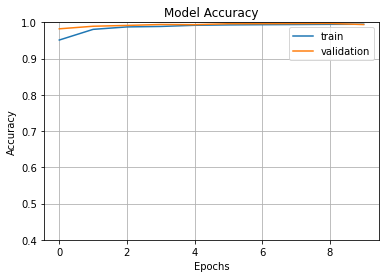

In [12]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Model Evaluation